## Project Idea
Sentiment Analysis over articles from top news sources to measure the amount of positive, negative, and neutral content each source has for each presidential candidate.

In [1]:
pip install newsapi-python

In [2]:
!pip install pydotplus

In [3]:
import requests  ## for getting data from a server GET
import re   ## for regular expressions
import pandas as pd    ## for dataframes and related
from pandas import DataFrame
from newsapi import NewsApiClient
import json

## To tokenize and vectorize text type data
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
## For word clouds
## conda install -c conda-forge wordcloud
## May also have to run conda update --all on cmd
#import PIL
#import Pillow
#import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
import random as rd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
#from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz

from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn
from sklearn.cluster import KMeans

from sklearn import preprocessing

import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

from scipy.sparse import hstack

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [ ]:
# apiKey = 'f8e44bd318094118ac173ceb480d0eee'           ## My API key
# url= "https://newsapi.org/v2/everything?q=football&sources=fox-news&pageSize=30&apiKey=" + apiKey


# response = requests.get(url)
# jsontxt = response.json()
# print(jsontxt, "\n")

In [ ]:
## Build the csv file and add the column names
## Create a new csv file to save the headlines
filename="presidental_sources.csv"
MyFILE=open(filename,"w")                     # "a" for append; "r" for read
## with open
### Place the column names in - write to the first row
WriteThis="LABEL,Date,Source,Title,Headline\n"
MyFILE.write(WriteThis)
MyFILE.close()

In [ ]:
# import requests

# apiKey = 'f8e44bd318094118ac173ceb480d0eee'           ## My API key
# url= "https://newsapi.org/v2/everything?q=biden&pageSize=30&apiKey=" + apiKey


# response = requests.get(url)
# jsontxt = response.json()
# print(jsontxt, "\n")

#### Pulling Relevant Articles using API

In [ ]:
endpoint  = "https://newsapi.org/v2/everything"
api_key   = 'f8e44bd318094118ac173ceb480d0eee'
from_date = '2024-02-18'                        # Format: YYYY-MM-DD
to_date   = '2024-03-01'                        # Format: YYYY-MM-DD
from_date2 = '2024-03-01'                        # Format: YYYY-MM-DD
to_date2   = '2024-03-18'                        # Format: YYYY-MM-DD


## Won't include or exclude any sources yet until we see what sources/source names are returned
# sources = ['Associated Press', 'Reuters', 'NPR', 'BBC', 'PBS', 'fox', 'msnbc']    # List of news sources to include; wanted to get a few most unbiased news sources, and some of the most biased sources to see the full distribution of sentiment for each candidate
exclude_domains = ['Biztoc.com']               # Domains to exclude


## We can choose whichever list; figure we could evaluate more candidates if we have time
# candidates = ["biden", "trump"]
candidates = ["biden", "trump", "nikki haley"]
# candidates = ["biden", "trump", "nikki haley", "dean phillips", "ryan binkley", "robert kennedy", "cornel west", "jill stein"]      # All current candidates according to the NYT (https://www.nytimes.com/interactive/2023/us/politics/presidential-candidates-2024.html)

In [ ]:
#### --------------------> GATHER - CLEAN - CREATE FILE

## RE: documentation and options
## https://newsapi.org/docs/endpoints/everything

endpoint = "https://newsapi.org/v2/everything"

################# enter for loop to collect data on three candidates


for candidate in candidates:
  # for source in sources:

      ## Dictionary Structure
      URLPost = {'apiKey':api_key,
                'q':candidate,
                # 'sources': ','.join(sources) if sources else None,
                 'excludeDomains':exclude_domains,
                'from': from_date2,
                'to': to_date2,
                'language':'en'
      }

      response=requests.get(endpoint, URLPost)
      print(response)
      jsontxt = response.json()
      print(jsontxt)
      #####################################################


      ## Open the file for append
      MyFILE=open(filename, "a")
      LABEL=candidate

      for items in jsontxt["articles"]:
          print(items, "\n\n\n")
          print("candidate: ", candidate)
          #Author=items["author"]
          #Author=str(Author)
          #Author=Author.replace(',', '')

          Source=items["source"]["name"]
          print(Source)

          Date=items["publishedAt"]
          ##clean up the date
          NewDate=Date.split("T")
          Date=NewDate[0]
          print(Date)

          ## CLEAN the Title
          ##----------------------------------------------------------
          ##Replace punctuation with space
          # Accept one or more copies of punctuation
          # plus zero or more copies of a space
          # and replace it with a single space
          Title=items["title"]
          Title=str(Title)
          #print(Title)
          Title=re.sub(r'[,.;@#?!&$\-\']+', ' ', str(Title), flags=re.IGNORECASE)
          Title=re.sub(' +', ' ', str(Title), flags=re.IGNORECASE)
          Title=re.sub(r'\"', ' ', str(Title), flags=re.IGNORECASE)

          # and replace it with a single space
          ## NOTE: Using the "^" on the inside of the [] means
          ## we want to look for any chars NOT a-z or A-Z and replace
          ## them with blank. This removes chars that should not be there.
          Title=re.sub(r'[^a-zA-Z]', " ", str(Title), flags=re.VERBOSE)
          Title=Title.replace(',', '')
          Title=' '.join(Title.split())
          Title=re.sub("\n|\r", "", Title)
          print(Title)
          ##----------------------------------------------------------

          Headline=items["description"]
          Headline=str(Headline)
          Headline=re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
          Headline=re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
          Headline=re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
          Headline=re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)
          ## Be sure there are no commas in the headlines or it will
          ## write poorly to a csv file....
          Headline=Headline.replace(',', '')
          Headline=' '.join(Headline.split())
          Headline=re.sub("\n|\r", "", Headline)

          ### AS AN OPTION - remove words of a given length............
          Headline = ' '.join([wd for wd in Headline.split() if len(wd)>3])

          #print("Author: ", Author, "\n")
          #print("Title: ", Title, "\n")
          #print("Headline News Item: ", Headline, "\n\n")

          #print(Author)
          print(Title)
          print(Headline)

          WriteThis=str(LABEL)+","+str(Date)+","+str(Source)+","+ str(Title) + "," + str(Headline) + "\n"
          print(WriteThis)

          MyFILE.write(WriteThis)

      ## CLOSE THE FILE
      MyFILE.close()

################## END for loop

<Response [200]>
{'status': 'ok', 'totalResults': 21634, 'articles': [{'source': {'id': 'wired', 'name': 'Wired'}, 'author': 'Vittoria Elliott', 'title': "The House Passed the Bill That Could Ban TikTok—and It Wasn't Close", 'description': 'If the Senate passes the bill, President Joe Biden has said he would sign it.', 'url': 'https://www.wired.com/story/congress-tiktok-ban/', 'urlToImage': 'https://media.wired.com/photos/65f1c5556d1c818fc4449530/191:100/w_1280,c_limit/House-Bans-TikTok-GettyImages-2081195969.jpg', 'publishedAt': '2024-03-13T15:34:04Z', 'content': 'This morning, the US House of Representatives voted to essentially ban TikTok, unless Chinese-owned Bytedance divests from the app entirely. If passed in the Senate, TikTok would have about 6 months … [+4094 chars]'}, {'source': {'id': 'the-verge', 'name': 'The Verge'}, 'author': 'Lauren Feiner', 'title': 'How to watch President Joe Biden’s State of the Union address', 'description': 'Biden will deliver the address for the l

### Cleaning Text Data

In [ ]:

BBC_DF=pd.read_csv(filename, error_bad_lines=False)
print(BBC_DF.head())
# iterating the columns
for col in BBC_DF.columns:
    print(col)

print(BBC_DF["Headline"])

## REMOVE any rows with NaN in them
BBC_DF = BBC_DF.dropna()
print(BBC_DF["Headline"])

### Tokenize and Vectorize the Headlines
## Create the list of headlines
## Keep the labels!

HeadlineLIST=[]
LabelLIST=[]
SourceLIST=[]

for nexthead, nextlabel, nextsource in zip(BBC_DF["Headline"], BBC_DF["LABEL"], BBC_DF["Source"]):
    HeadlineLIST.append(nexthead)
    LabelLIST.append(nextlabel)
    SourceLIST.append(nextsource)

print("The headline list is:\n")
print(HeadlineLIST)

print("The label list is:\n")
print(LabelLIST)

print("The source list is:\n")
print(SourceLIST)

   LABEL        Date     Source  \
0  biden  2024-03-13      Wired   
1  biden  2024-03-07  The Verge   
2  biden  2024-03-07   BBC News   
3  biden  2024-03-13   BBC News   
4  biden  2024-03-15   BBC News   

                                               Title  \
0  The House Passed the Bill That Could Ban TikTo...   
1  How to watch President Joe Biden s State of th...   
2       Trump challenges Biden to TV debates anytime   
3     Biden and Trump clinch their party nominations   
4        Stormont return positive step forward Biden   

                                            Headline  
0  Senate passes bill President Biden said would ...  
1  Biden will deliver address last time before No...  
2  Trump says will anytime Biden camp says Republ...  
3  Both pass delegate threshold needed their part...  
4  president meets Taoiseach Varadkar White House...  
LABEL
Date
Source
Title
Headline
0      Senate passes bill President Biden said would ...
1      Biden will deliver addres

<ipython-input-7-c218348997ac>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  BBC_DF=pd.read_csv(filename, error_bad_lines=False)


In [ ]:
## Remove all candidates' names from the list
NewHeadlineLIST=[]

## Additional words/tokens to remove
additional_remove = ["nikki", "haley", "donald"]


for element in HeadlineLIST:
    # print(element)
    # print(type(element))
    ## make into list
    AllWords=element.split(" ")
    print(AllWords)

    NewWordsList=[]
    for word in AllWords:
        # print(word)
        word=word.lower()
        if word in candidates:
          pass
            # print(word)
        elif word in additional_remove:
          pass
        else:
            NewWordsList.append(word)

    ##turn back to string
    NewWords=" ".join(NewWordsList)
    ## Place into NewHeadlineLIST
    NewHeadlineLIST.append(NewWords)


##
## Set the HeadlineLIST to the new one
HeadlineLIST=NewHeadlineLIST
# print(HeadlineLIST)

['Senate', 'passes', 'bill', 'President', 'Biden', 'said', 'would', 'sign']
['Biden', 'will', 'deliver', 'address', 'last', 'time', 'before', 'November', 'election', 'where', 'likely', 'face', 'former', 'President', 'Donald', 'Trump']
['Trump', 'says', 'will', 'anytime', 'Biden', 'camp', 'says', 'Republican', 'thirsty', 'attention']
['Both', 'pass', 'delegate', 'threshold', 'needed', 'their', 'parties', 'nominations', 'projects']
['president', 'meets', 'Taoiseach', 'Varadkar', 'White', 'House', 'Friday', 'ahead', 'Patrick']
['Democrats', 'Republicans', 'choosing', 'they', 'want', 'stand', 'president', 'with', 'Trump', 'Biden', 'rematch', 'looking', 'likely']
['Conspiracy', 'theorists', 'spent', 'Thursday', 'trying', 'claim', 'President', 'Biden', 'accidentally', 'admitted', 'that', 'directed', 'energy', 'weapons', 'were', 'being', 'used', 'start', 'devastating', 'wildfires', 'like', 'Texas', 'this', 'week', 'that', 'become', 'largest', 'state', 'history']
['address', 'Congress', 'will'

In [ ]:
NewHeadlineLIST

['senate passes bill president said would sign',
 'will deliver address last time before november election where likely face former president',
 'says will anytime camp says republican thirsty attention',
 'both pass delegate threshold needed their parties nominations projects',
 'president meets taoiseach varadkar white house friday ahead patrick',
 'democrats republicans choosing they want stand president with rematch looking likely',
 'conspiracy theorists spent thursday trying claim president accidentally admitted that directed energy weapons were being used start devastating wildfires like texas this week that become largest state history',
 'address congress will rare chance speak huge national audience before november election',
 'president will seek fight concerns over contrast term office with',
 'senator schumer said thursday that israel risked becoming pariah with netanyahu charge',
 'truth social social media platform launched suffered widespread outage thursday unfortunate

In [ ]:
#########################################
##
##  Build the labeled dataframe
##
######################################################

### Vectorize
## Instantiate your CV
MyCountV=CountVectorizer(
        input="content",  ## because we have a csv file
        lowercase=True,
        stop_words = "english",
        max_features=200
        )

## Use your CV
MyDTM = MyCountV.fit_transform(HeadlineLIST)  # create a sparse matrix
print(type(MyDTM))


ColumnNames=MyCountV.get_feature_names_out()
#print(type(ColumnNames))


## Build the data frame
MyDTM_DF=pd.DataFrame(MyDTM.toarray(),columns=ColumnNames)

## Convert the labels from list to df
Labels_DF = DataFrame(LabelLIST,columns=['LABEL'])

## Convert the labels from list to df
Sources_DF = DataFrame(SourceLIST,columns=['Source'])



## Check your new DF and you new Labels df:
print("Labels\n")
print(Labels_DF)
print("Sources\n")
print(Sources_DF)
print("News df\n")
print(MyDTM_DF.iloc[:,0:6])

##Save original DF - without the lables
My_Orig_DF=MyDTM_DF
print(My_Orig_DF)



<class 'scipy.sparse._csr.csr_matrix'>
Labels

           LABEL
0          biden
1          biden
2          biden
3          biden
4          biden
..           ...
295  nikki haley
296  nikki haley
297  nikki haley
298  nikki haley
299  nikki haley

[300 rows x 1 columns]
Sources

         Source
0         Wired
1     The Verge
2      BBC News
3      BBC News
4      BBC News
..          ...
295  Biztoc.com
296      Forbes
297  Biztoc.com
298    NBC News
299      Forbes

[300 rows x 1 columns]
News df

     ability  abortion  according  address  administration  agreed
0          0         0          0        0               0       0
1          0         0          0        1               0       0
2          0         0          0        0               0       0
3          0         0          0        0               0       0
4          0         0          0        0               0       0
..       ...       ...        ...      ...             ...     ...
295        0         0

In [ ]:
Sources_DF

,Source
0,Wired
1,The Verge
2,BBC News
3,BBC News
4,BBC News
...,...
295,Biztoc.com
296,Forbes
297,Biztoc.com
298,NBC News


### Candidates and Sources Analysis

In [ ]:
## Creating df with Candidates and News Sources
candidate_sources = [Labels_DF, Sources_DF]
print(candidate_sources)

candidate_sources_DF = pd.concat(candidate_sources,axis=1, join='inner')

[           LABEL
0          biden
1          biden
2          biden
3          biden
4          biden
..           ...
295  nikki haley
296  nikki haley
297  nikki haley
298  nikki haley
299  nikki haley

[300 rows x 1 columns],          Source
0         Wired
1     The Verge
2      BBC News
3      BBC News
4      BBC News
..          ...
295  Biztoc.com
296      Forbes
297  Biztoc.com
298    NBC News
299      Forbes

[300 rows x 1 columns]]


In [ ]:
# prompt: show a table that summarizes the number of observations each LABEL for each Source using the candidate_sources_DF

import pandas as pd
print(pd.crosstab(candidate_sources_DF['Source'], candidate_sources_DF['LABEL']))


LABEL                biden  nikki haley  trump
Source                                        
ABC News                 7           21      0
Al Jazeera English       0            6      0
BBC News                 7            8      7
Biztoc.com               0            4      0
Business Insider        50           20     60
Deadline                 0            3      0
Engadget                 4            0      1
Forbes                   0            4      0
Gizmodo.com              4            0      3
MarketWatch              0            2      0
NBC News                 0            1      0
NPR                     16           11     19
Poynter                  0            1      0
ReadWrite                0            0      2
Rolling Stone            0            2      0
Slashdot.org             1            0      0
Slate Magazine           0            1      0
TMZ                      0            1      0
The A.V. Club            0            1      0
The Atlantic 

In [ ]:
# prompt: Using dataframe candidate_sources_DF: Sum each of the Sources and order in decending order

candidate_sources_DF.groupby('Source').size().sort_values(ascending=False)


Source
Business Insider       130
NPR                     46
ABC News                28
BBC News                22
Time                    13
Gizmodo.com              7
The Verge                6
Al Jazeera English       6
Engadget                 5
Yahoo Entertainment      4
Biztoc.com               4
Forbes                   4
Wired                    3
Deadline                 3
The Atlantic             2
MarketWatch              2
The Indian Express       2
Rolling Stone            2
ReadWrite                2
The A.V. Club            1
TMZ                      1
Slate Magazine           1
The New Republic         1
Slashdot.org             1
TheBlaze                 1
Theonion.com             1
Poynter                  1
NBC News                 1
dtype: int64

In [ ]:
## Now - let's create a complete and labeled dataframe:
dfs = [Labels_DF, MyDTM_DF]
print(dfs)

Final_News_DF_Labeled = pd.concat(dfs,axis=1, join='inner')
## DF with labels

[           LABEL
0          biden
1          biden
2          biden
3          biden
4          biden
..           ...
295  nikki haley
296  nikki haley
297  nikki haley
298  nikki haley
299  nikki haley

[300 rows x 1 columns],      ability  abortion  according  address  administration  agreed  ahead  \
0          0         0          0        0               0       0      0   
1          0         0          0        1               0       0      0   
2          0         0          0        0               0       0      0   
3          0         0          0        0               0       0      0   
4          0         0          0        0               0       0      1   
..       ...       ...        ...      ...             ...     ...    ...   
295        0         0          0        0               0       0      0   
296        0         0          0        0               0       0      0   
297        0         0          0        0               0       0      0   


## Cleaned and Labeled Data in a Dataframe

In [ ]:
#############################################
##
## Create Training and Testing Data
##
## Then model and test the Decision Tree
##
################################################


## Before we start our modeling, let's visualize and
## explore.

##It might be very interesting to see the word clouds
## for each  of the candidates.
##--------------------------------------------------------
List_of_WC=[]

for mycandidate in candidates:

    tempdf = Final_News_DF_Labeled[Final_News_DF_Labeled['LABEL'] == mycandidate]
    print(tempdf)

    tempdf =tempdf.sum(axis=0,numeric_only=True)
    #print(tempdf)

    #Make var name
    NextVarName=str("wc"+str(mycandidate))
    #print( NextVarName)

    ##In the same folder as this code, I have three images
    ## They are called: food.jpg, bitcoin.jpg, and sports.jpg
    #next_image=str(str(mycandidate) + ".jpg")
    #print(next_image)

    ## https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

    ###########
    ## Create and store in a list the wordcloud OBJECTS
    #########
    NextVarName = WordCloud(width=1000, height=600, background_color="white",
                   min_word_length=4, #mask=next_image,
                   max_words=70).generate_from_frequencies(tempdf)

    ## Here, this list holds all three wordclouds I am building
    List_of_WC.append(NextVarName)


##------------------------------------------------------------------

NameError: name 'candidates' is not defined

0
biden
1
trump
2
nikki haley


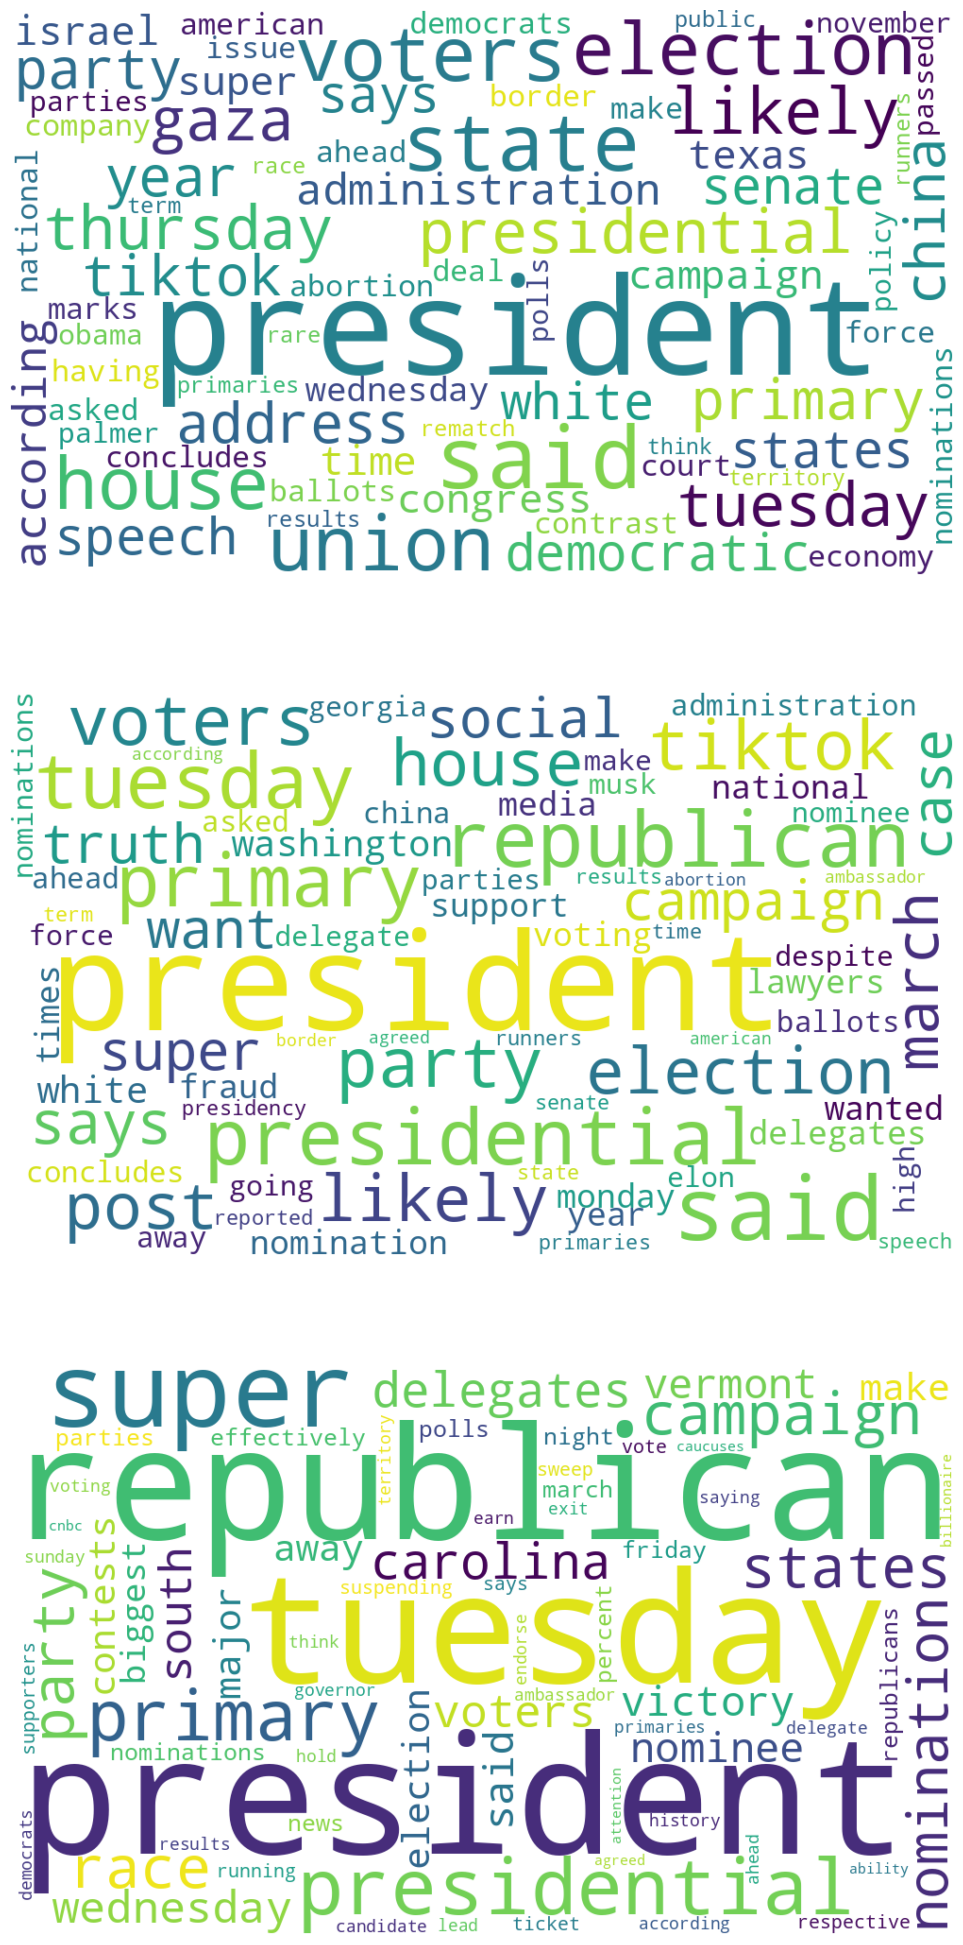

In [ ]:
##########
########## Create the wordclouds
##########
fig=plt.figure(figsize=(25, 25))
#figure, axes = plt.subplots(nrows=2, ncols=2)
Numcandidates=len(candidates)
for i in range(Numcandidates):
    print(i)
    print(candidates[i])
    ax = fig.add_subplot(Numcandidates,1,i+1)
    plt.imshow(List_of_WC[i], interpolation='bilinear')
    plt.axis("off")
    plt.savefig("NewClouds.pdf")

# Data Review + EDA

In [4]:
BBC_DF = pd.read_csv("presidental_sources.csv")

In [5]:
BBC_DF

,LABEL,Date,Source,Title,Headline
0,biden,2/24/2024,Wired,Joe Biden Joined TikTok Because He Had To,Biden campaign TikTok account rocky start they...
1,biden,2/28/2024,Yahoo Entertainment,Biden signs executive order to stop Russia and...,President Biden signed executive order that ai...
2,biden,2/23/2024,BBC News,Biden meets Alexei Navalny s widow and daughter,private meeting came prepared announced raft s...
3,biden,3/1/2024,Gizmodo.com,No Biden Didn t Admit Texas Wildfires Were Cau...,Conspiracy theorists spent Thursday trying cla...
4,biden,2/22/2024,Gizmodo.com,Will Stancil Notable Twitter Pugilist Announce...,Will Stancil made name himself online feisty d...
...,...,...,...,...,...
595,nikki haley,3/7/2024,Biztoc.com,Ronny Chieng Is Sad to See Nikki Haley Go,Welcome Best Late Night rundown previous night...
596,nikki haley,3/6/2024,NBC News,LEADS IN VERMONT,LEADS VERMONT Main headline story link Related...
597,nikki haley,3/4/2024,Forbes,Nikki Haley Beats Trump In D C To Score First ...,Haley spokesperson Olivia Perez Cubas pointed ...
598,nikki haley,3/5/2024,TMZ,Charles Barkley Vows to Punch Any Black Person...,Charles Barkley pointed somewhat violent messa...


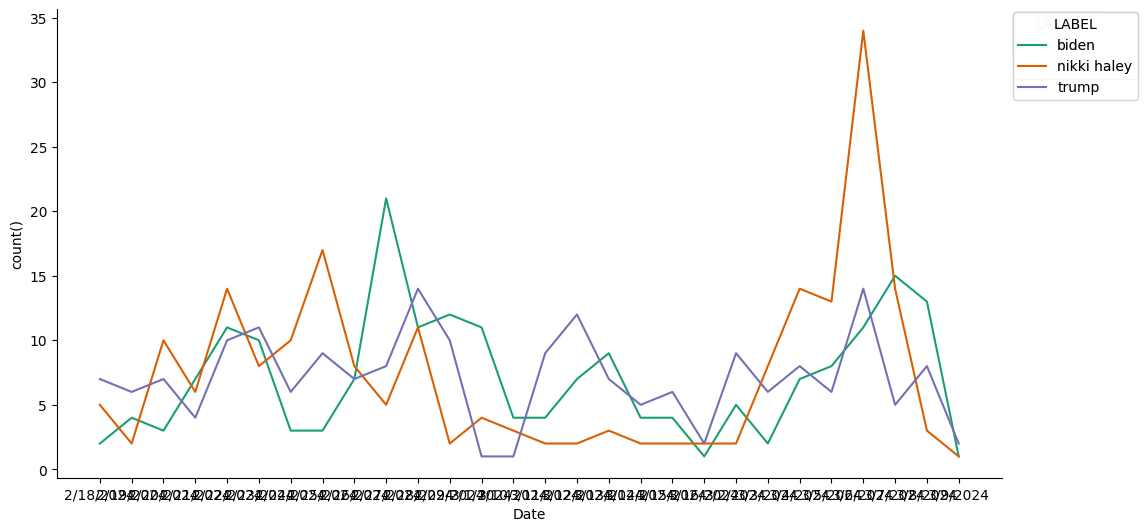

In [ ]:
## Graph recommended/created by Colab
# @title Date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = BBC_DF.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('LABEL')):
  _plot_series(series, series_name, i)
  fig.legend(title='LABEL', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

To further clean and normalize the data, the article's title and headline were joined together and  including:

* Converting all text to lowercase, and removing words/tokens that have
* text enclosed in square brackets (which might represent citations or hyperlinks),
* removing URLs,
Strips HTML tags, which might be present in web-scraped data.
Removes punctuation.
Eliminates newline characters (\n).
Removes words containing numbers, which might be irrelevant for text analysis.

In [6]:
# Combine title and headline into a single text column
BBC_DF['Article_Text'] = BBC_DF['Title'] + ' ' + BBC_DF['Headline'] # Adjust column names as necessary

# Drop the original title and headline columns
BBC_DF = BBC_DF.drop(['Title', 'Headline'], axis=1) # Adjust column names as necessary

# Check for and handle missing values
# For simplicity, this example drops rows with any missing values
BBC_DF.dropna(inplace=True)

# Normalize the text (convert to lowercase, remove punctuation, etc.)
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

BBC_DF['Article_Text'] = BBC_DF['Article_Text'].apply(lambda x: clean_text(x))

# Optionally, normalize the source column (if categorization is inconsistent)
# df['Source'] = df['Source'].str.lower()

print(BBC_DF.head())


   LABEL       Date               Source  \
0  biden  2/24/2024                Wired   
1  biden  2/28/2024  Yahoo Entertainment   
2  biden  2/23/2024             BBC News   
3  biden   3/1/2024          Gizmodo.com   
4  biden  2/22/2024          Gizmodo.com   

                                        Article_Text  
0  joe biden joined tiktok because he had to bide...  
1  biden signs executive order to stop russia and...  
2  biden meets alexei navalny s widow and daughte...  
3  no biden didn t admit texas wildfires were cau...  
4  will stancil notable twitter pugilist announce...  


In [27]:
# prompt: For the rows that have a Sources that is in the list ['Biztoc.com', 'Business Insider', 'NPR', 'Time', 'ABC News', 'Al Jazeera English', 'Forbes', 'Politico', 'MarketWatch'] from the dataframe BBC_DF, replace that value with "Other"

BBC_DF['Source'] = BBC_DF['Source'].replace(['Biztoc.com', 'Business Insider', 'NPR', 'Time', 'ABC News', 'Al Jazeera English', 'Forbes', 'Politico', 'MarketWatch'], 'Other')


In [28]:
BBC_DF

,LABEL,Date,Source,Article_Text,Sentiment Score,Cluster
0,nikki haley,3/4/2024,Other,nikki haley beats trump in d c gop primary not...,0.8316,7
1,nikki haley,2/24/2024,Associated Press,trump enters sc primary looking to embarrass h...,0.2732,2
2,nikki haley,2/25/2024,The-sun.com,she s not giving up nikki haley vowed that wil...,0.3724,10
3,biden,3/2/2024,Other,is biden too old voters to view state of the u...,0.0000,4
4,nikki haley,2/19/2024,Theonion.com,putin claims russia would prefer a second bide...,0.0000,4
...,...,...,...,...,...,...
695,biden,3/4/2024,Gizmodo.com,washers and dryers are about to get way more e...,0.7841,7
696,trump,3/12/2024,ReadWrite,trump asked elon musk if he wanted to buy trut...,0.7096,15
697,nikki haley,3/4/2024,Other,super tuesday trump could sweep but haley may ...,0.9601,7
698,nikki haley,2/21/2024,The Indian Express,nikki haley says she is not dropping out i fee...,-0.3818,4


In [29]:
import nltk
nltk.download('vader_lexicon') # Download the VADER lexicon
from nltk.sentiment import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [30]:
sia = SentimentIntensityAnalyzer()

# Apply VADER to compute sentiment scores
BBC_DF['sentiment_scores'] = BBC_DF['Article_Text'].apply(lambda text: sia.polarity_scores(text))

# Optionally, if you're interested in the compound score only
BBC_DF['Sentiment Score'] = BBC_DF['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

BBC_DF = BBC_DF[['LABEL', 'Date', 'Source', 'Article_Text', 'Sentiment Score']]

print(BBC_DF.head())

         LABEL       Date            Source  \
0  nikki haley   3/4/2024             Other   
1  nikki haley  2/24/2024  Associated Press   
2  nikki haley  2/25/2024       The-sun.com   
3        biden   3/2/2024             Other   
4  nikki haley  2/19/2024      Theonion.com   

                                        Article_Text  Sentiment Score  
0  nikki haley beats trump in d c gop primary not...           0.8316  
1  trump enters sc primary looking to embarrass h...           0.2732  
2  she s not giving up nikki haley vowed that wil...           0.3724  
3  is biden too old voters to view state of the u...           0.0000  
4  putin claims russia would prefer a second bide...           0.0000  


In [31]:
BBC_DF.head(2)

,LABEL,Date,Source,Article_Text,Sentiment Score
0,nikki haley,3/4/2024,Other,nikki haley beats trump in d c gop primary not...,0.8316
1,nikki haley,2/24/2024,Associated Press,trump enters sc primary looking to embarrass h...,0.2732


In [32]:
# prompt: For each of the LABEL values in the BBC_DF return the Article_Text that has the highest and lowest Sentiment Score

# Get the highest Sentiment Score for each LABEL
highest_sentiment_articles = BBC_DF.groupby('LABEL')['Sentiment Score'].idxmax()

# Get the lowest Sentiment Score for each LABEL
lowest_sentiment_articles = BBC_DF.groupby('LABEL')['Sentiment Score'].idxmin()

# Print the Article_Text for the highest and lowest Sentiment Score for each LABEL
for label in BBC_DF['LABEL'].unique():
    print(f"Highest Sentiment Score for {label}:")
    print(BBC_DF.loc[highest_sentiment_articles[label], 'Article_Text'])
    print(f"\nLowest Sentiment Score for {label}:")
    print(BBC_DF.loc[lowest_sentiment_articles[label], 'Article_Text'])
    print("\n")


Highest Sentiment Score for nikki haley:
super tuesday trump could sweep but haley may surprise in these states donald trump huge leads over nikki haley many polls focused super tuesday states there some states where advantage massive

Lowest Sentiment Score for nikki haley:
donald trump rages at nikki haley after losing washington d c primary trump accused haley being loser after sunday race percent percent trump accused haley being loser after sunday race percent percent donald trump lashed birdbrain nikki haley afte


Highest Sentiment Score for biden:
things to watch for in super tuesday s races sixteen states territory will hold nominating contests super tuesday trump biden haley others compete

Lowest Sentiment Score for biden:
judge to consider detention for fbi informant charged with lying about biden federal judge considering keeping alexander smirnov former informant charged with lying bureau about president biden detained pending trial


Highest Sentiment Score for trump:
ru

# Balancing the Dataset with Oversample/Undersampling

In [33]:
# Separate the dataset into a list of dataframes, one for each class
dfs = []
for category in BBC_DF['Source'].unique():
    df_category = BBC_DF[BBC_DF['Source'] == category]
    dfs.append(df_category)

# Resample each dataframe to have 20 instances
resampled_dfs = []
for df in dfs:
    if len(df) > 20:
        # If the class has more than 20 instances, downsample to 20
        df_resampled = resample(df, replace=False, n_samples=20, random_state=42)
    else:
        # If the class has less than 20 instances, oversample to 20
        df_resampled = resample(df, replace=True, n_samples=20, random_state=42)
    resampled_dfs.append(df_resampled)

# Concatenate the resampled dataframes back into a single dataframe
BBC_DF_resampled = pd.concat(resampled_dfs)

# Shuffle the resampled dataframe to mix the classes well
BBC_DF_resampled = BBC_DF_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

print(BBC_DF_resampled['Source'].value_counts())

BBC_DF = BBC_DF_resampled


The Verge              20
The-sun.com            20
Gizmodo.com            20
Jezebel                20
Engadget               20
Associated Press       20
Wired                  20
TMZ                    20
BBC News               20
NBC News               20
Deadline               20
TheBlaze               20
The New Republic       20
Poynter                20
Theonion.com           20
Slate Magazine         20
The-express.com        20
The Atlantic           20
Other                  20
ReadWrite              20
The Next Web           20
The Indian Express     20
Slashdot.org           20
Yahoo Entertainment    20
The New Yorker         20
The Hill               20
Rolling Stone          20
Name: Source, dtype: int64


# New Models (Logistic Regression, K-Means Clustering, Random Forest, Decision Tree)

## Logistic Regression Model

In [34]:
# Assuming BBC_DF is your DataFrame
X = BBC_DF[['LABEL', 'Article_Text', 'Sentiment Score']]
y = BBC_DF['Source']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer to handle the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(), 'Article_Text'),
        ('onehot', OneHotEncoder(), ['LABEL'])
    ],
    remainder='passthrough'  # This allows us to keep the sentiment scores without transformation
)

from sklearn.linear_model import LogisticRegression

# Adjust the pipeline to use Logistic Regression with balanced class weights
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())  # Adjusting class weights
])

# Train the model
model.fit(X_train, y_train)

# Predicting the test set
y_pred = model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(" ")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8981481481481481
 
Classification Report:
                      precision    recall  f1-score   support

   Associated Press       1.00      1.00      1.00         3
           BBC News       1.00      0.75      0.86         4
           Deadline       1.00      1.00      1.00         3
           Engadget       0.80      1.00      0.89         4
        Gizmodo.com       0.62      0.83      0.71         6
            Jezebel       1.00      1.00      1.00         6
           NBC News       1.00      1.00      1.00         5
              Other       0.00      0.00      0.00         2
            Poynter       1.00      1.00      1.00         3
          ReadWrite       0.67      1.00      0.80         2
      Rolling Stone       1.00      1.00      1.00         2
       Slashdot.org       1.00      1.00      1.00         7
     Slate Magazine       1.00      1.00      1.00         7
                TMZ       1.00      1.00      1.00         3
       The Atlantic       1.0

In [37]:
# prompt: order the Sources from the BBC_DF dataframe in order from most accurate to least accurate from the classification_report(y_test, y_pred)

import pandas as pd
# Get the classification report as a DataFrame
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

# Sort the DataFrame by the 'f1-score' column in descending order
sorted_report_df = report_df.T.sort_values(by=['f1-score', 'recall'], ascending=False)

# Print the sorted DataFrame
print("Most Accurate News Sources from\nthe Logistic Regession Model:\n\n", sorted_report_df[0:15])



Most Accurate News Sources from
the Logistic Regession Model:

                     precision  recall  f1-score  support
Associated Press          1.0     1.0       1.0      3.0
Deadline                  1.0     1.0       1.0      3.0
Jezebel                   1.0     1.0       1.0      6.0
NBC News                  1.0     1.0       1.0      5.0
Poynter                   1.0     1.0       1.0      3.0
Rolling Stone             1.0     1.0       1.0      2.0
Slashdot.org              1.0     1.0       1.0      7.0
Slate Magazine            1.0     1.0       1.0      7.0
TMZ                       1.0     1.0       1.0      3.0
The Atlantic              1.0     1.0       1.0      4.0
The Hill                  1.0     1.0       1.0      5.0
The Indian Express        1.0     1.0       1.0      5.0
The New Republic          1.0     1.0       1.0      2.0
The Next Web              1.0     1.0       1.0      2.0
The-express.com           1.0     1.0       1.0      5.0


## K-Means Clustering

In [38]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the Article_Text to get the feature matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(BBC_DF['Article_Text'])

# Since we're including the Sentiment Score, let's add it to the TF-IDF feature matrix
sentiment_scores = BBC_DF['Sentiment Score'].values.reshape(-1, 1)

# Combine the TF-IDF features with the Sentiment Scores
features = hstack([tfidf_matrix, sentiment_scores])


### Elbow Method to Determine Optimal Number of Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


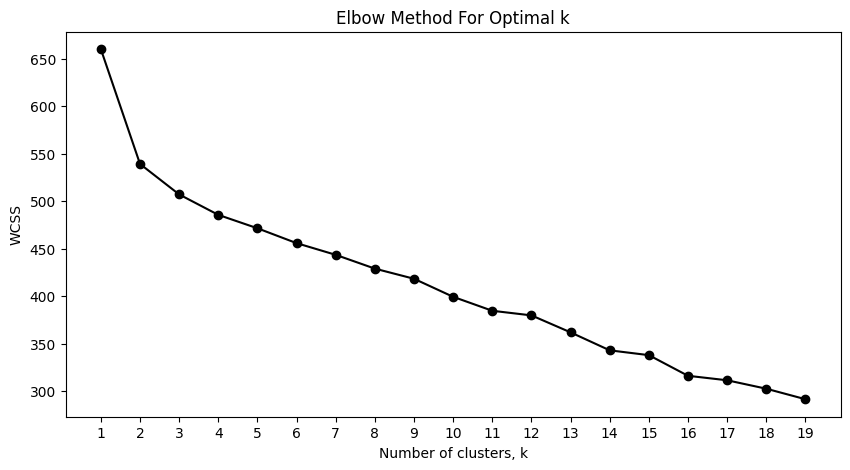

In [39]:
# Prepare your features as before, combining TF-IDF vectors and Sentiment Scores
# Assuming 'features' variable is ready from the previous steps

# Range of k we want to try
k_values = range(1, 20)

# Empty list to store the WCSS for each k
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 5))
plt.plot(k_values, wcss, '-o', color='black')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.show()


In [61]:
from sklearn.cluster import KMeans

# Choose the number of clusters (k) and initialize KMeans
# The choice of k depends on the data and your goals. You might start with 5 as an example
k = 14
kmeans = KMeans(n_clusters=k, random_state=420)

# Fit KMeans using the features
kmeans.fit(features)

# Get the cluster assignments for each article
clusters = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [62]:
# Add the cluster assignments to your dataframe
BBC_DF['Cluster'] = clusters

# Explore the clusters
for i in range(k):
    print(f"Cluster {i}:")
    print(BBC_DF[BBC_DF['Cluster'] == i]['Source'].value_counts())
    print("\n")


Cluster 0:
The-sun.com    20
Name: Source, dtype: int64


Cluster 1:
The-express.com    20
NBC News           11
Name: Source, dtype: int64


Cluster 2:
The Atlantic           12
Yahoo Entertainment     9
Theonion.com            7
The Verge               7
BBC News                6
Wired                   6
Other                   5
The Indian Express      4
Deadline                4
Engadget                3
The New Republic        2
Name: Source, dtype: int64


Cluster 3:
The Next Web    20
Name: Source, dtype: int64


Cluster 4:
The Hill        20
Slashdot.org    20
NBC News         9
Name: Source, dtype: int64


Cluster 5:
The Indian Express     16
Theonion.com            8
Other                   6
TMZ                     6
Slate Magazine          5
BBC News                5
Gizmodo.com             4
Deadline                3
Yahoo Entertainment     1
Name: Source, dtype: int64


Cluster 6:
Poynter                20
Wired                  14
TMZ                    14
Slate Magazin

### Cluster Analysis

In [63]:
# Calculate the average sentiment score for each cluster
average_sentiment = BBC_DF.groupby('Cluster')['Sentiment Score'].mean()
print(average_sentiment)


Cluster
0     0.372400
1     0.520610
2    -0.227425
3     0.890800
4    -0.134816
5     0.552678
6    -0.786995
7     0.508650
8     0.849700
9     0.709600
10    0.077200
11    0.275100
12    0.275713
13    0.407871
Name: Sentiment Score, dtype: float64


### Cluster Keyword Analysis

In [64]:
# Function to get top keywords for each cluster
def get_top_keywords(n_terms):
    df_clusters_keywords = {}
    for i in range(k):
        # Mask to select only articles in the current cluster
        cluster_mask = BBC_DF['Cluster'] == i
        text_in_cluster = BBC_DF[cluster_mask]['Article_Text']

        # Initialize and fit CountVectorizer
        count_vectorizer = CountVectorizer(stop_words='english')
        X_cluster = count_vectorizer.fit_transform(text_in_cluster)
        terms = count_vectorizer.get_feature_names_out()

        # Sum the term frequencies in the cluster
        term_frequencies = np.sum(X_cluster.toarray(), axis=0)

        # Sort terms by frequency
        sorted_terms = terms[np.argsort(term_frequencies)[::-1][:n_terms]]
        df_clusters_keywords[f'Cluster {i}'] = sorted_terms

    return df_clusters_keywords

# Get the top 10 keywords for each cluster
top_keywords_per_cluster = get_top_keywords(10)

# Print the results
for cluster, keywords in top_keywords_per_cluster.items():
    print(cluster, ":", keywords)
    print(" ")

Cluster 0 : ['trump' 'vowed' 'haley' 'crushing' 'defeat' 'despite' 'donald' 'emerged'
 'giving' 'home']
 
Cluster 1 : ['results' 'claims' 'technically' 'divided' 'election' 'republicans'
 'haley' 'trump' 'story' 'link']
 
Cluster 2 : ['haley' 'nikki' 'trump' 'race' 'campaign' 'republican' 'says' 'remain'
 'musk' 'lemon']
 
Cluster 3 : ['lockbit' 'trump' 'russia' 'linked' 'hackers' 'world' 'donald'
 'celebrating' 'champagne' 'cops']
 
Cluster 4 : ['president' 'trump' 'voice' 'impersonations' 'biden' 'saturday' 'white'
 'entertainment' 'industries' 'included']
 
Cluster 5 : ['haley' 'nikki' 'trump' 'tuesday' 'super' 'race' 'presidential'
 'republican' 'donald' 'major']
 
Cluster 6 : ['haley' 'nikki' 'trump' 'time' 'president' 'election' 'nasty' 'prepare'
 'donald' 'tiktok']
 
Cluster 7 : ['haley' 'nikki' 'endorse' 'nominee' 'pledge' 'republican' 'trump'
 'committee' 'eventual' 'feels']
 
Cluster 8 : ['trump' 'haley' 'nikki' 'donald' 'republican' 'urging' 'news' 'having'
 'pressing' 'reac

### Clustering Visualization

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 540 samples in 0.001s...
[t-SNE] Computed neighbors for 540 samples in 0.149s...
[t-SNE] Computed conditional probabilities for sample 540 / 540
[t-SNE] Mean sigma: 0.528263
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.896717
[t-SNE] KL divergence after 300 iterations: 0.152106


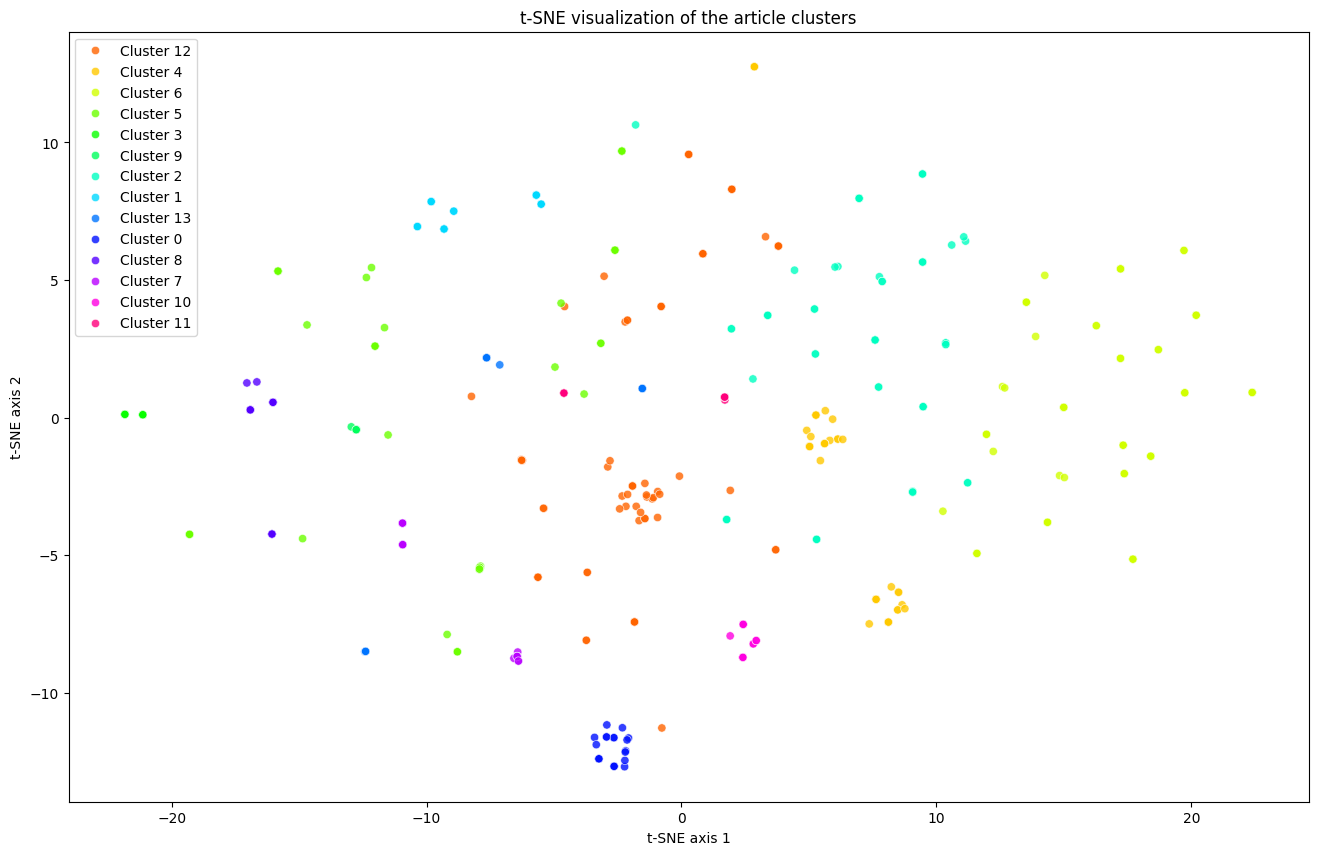

In [65]:
# Convert the features to a dense numpy array if they are not already
# This is necessary because t-SNE does not work with sparse matrix representations
dense_features = features.todense() if hasattr(features, "todense") else features

# Now convert the dense matrix to a numpy array
dense_features_array = np.asarray(dense_features)

# Apply t-SNE to the array of features to reduce the dimensionality to 2 dimensions
tsne = TSNE(n_components=2, verbose=1, random_state=42, n_iter=300)
tsne_results = tsne.fit_transform(dense_features_array)

# Plot the results of t-SNE
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=['Cluster ' + str(i) for i in clusters],  # Color by clusters
    palette=sns.color_palette("hsv", n_colors=k),  # Use a distinct color for each cluster
    legend="full",
    alpha=0.8
)

plt.title('t-SNE visualization of the article clusters')
plt.xlabel('t-SNE axis 1')
plt.ylabel('t-SNE axis 2')
plt.show()


## Random Forest Classifier

In [57]:
# Create a pipeline with a RandomForestClassifier
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
rf_model.fit(X_train, y_train)

# Predicting the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(" ")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9722222222222222
 
Classification Report:
                      precision    recall  f1-score   support

   Associated Press       1.00      1.00      1.00         3
           BBC News       0.67      1.00      0.80         4
           Deadline       1.00      1.00      1.00         3
           Engadget       1.00      1.00      1.00         4
        Gizmodo.com       1.00      1.00      1.00         6
            Jezebel       1.00      1.00      1.00         6
           NBC News       1.00      1.00      1.00         5
              Other       1.00      0.50      0.67         2
            Poynter       1.00      1.00      1.00         3
          ReadWrite       0.67      1.00      0.80         2
      Rolling Stone       1.00      1.00      1.00         2
       Slashdot.org       1.00      1.00      1.00         7
     Slate Magazine       1.00      1.00      1.00         7
                TMZ       1.00      1.00      1.00         3
       The Atlantic       1.0

In [ ]:
# # prompt: order the Sources from the BBC_DF dataframe in order from most accurate to least accurate from the classification_report(y_test, y_pred)

# import pandas as pd
# # Get the classification report as a DataFrame
# report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

# # Sort the DataFrame by the 'f1-score' column in descending order
# sorted_report_df = report_df.T.sort_values(by=['f1-score', 'recall'], ascending=False)

# # Print the sorted DataFrame
# print("Most Accurate News Sources from\nthe Logistic Regession Model:\n\n", sorted_report_df)



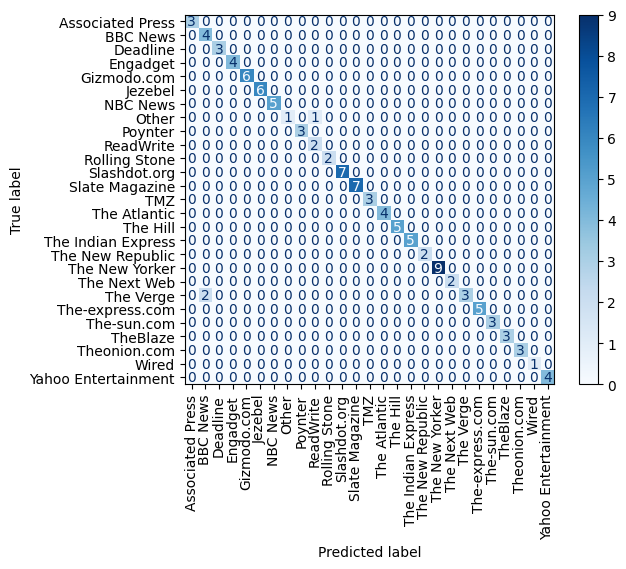

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.show()


## Decision Tree Model

In [60]:
# Adjust the classifier to limit the depth of the tree
dt_condensed_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=30, random_state=42))  # Setting max_depth to 30
])

# Train the condensed model
dt_condensed_model.fit(X_train, y_train)

# Predicting the test set with the condensed model
y_pred_condensed = dt_condensed_model.predict(X_test)

# Evaluating the condensed model
print("Accuracy (Condensed):", accuracy_score(y_test, y_pred_condensed))
print("\nClassification Report (Condensed):\n", classification_report(y_test, y_pred_condensed))


Accuracy (Condensed): 0.9629629629629629

Classification Report (Condensed):
                      precision    recall  f1-score   support

   Associated Press       1.00      1.00      1.00         3
           BBC News       1.00      0.75      0.86         4
           Deadline       1.00      1.00      1.00         3
           Engadget       1.00      1.00      1.00         4
        Gizmodo.com       1.00      1.00      1.00         6
            Jezebel       1.00      1.00      1.00         6
           NBC News       1.00      1.00      1.00         5
              Other       1.00      0.50      0.67         2
            Poynter       1.00      1.00      1.00         3
          ReadWrite       0.67      1.00      0.80         2
      Rolling Stone       1.00      1.00      1.00         2
       Slashdot.org       1.00      1.00      1.00         7
     Slate Magazine       1.00      1.00      1.00         7
                TMZ       1.00      1.00      1.00         3
      

In [50]:
!pip install graphviz

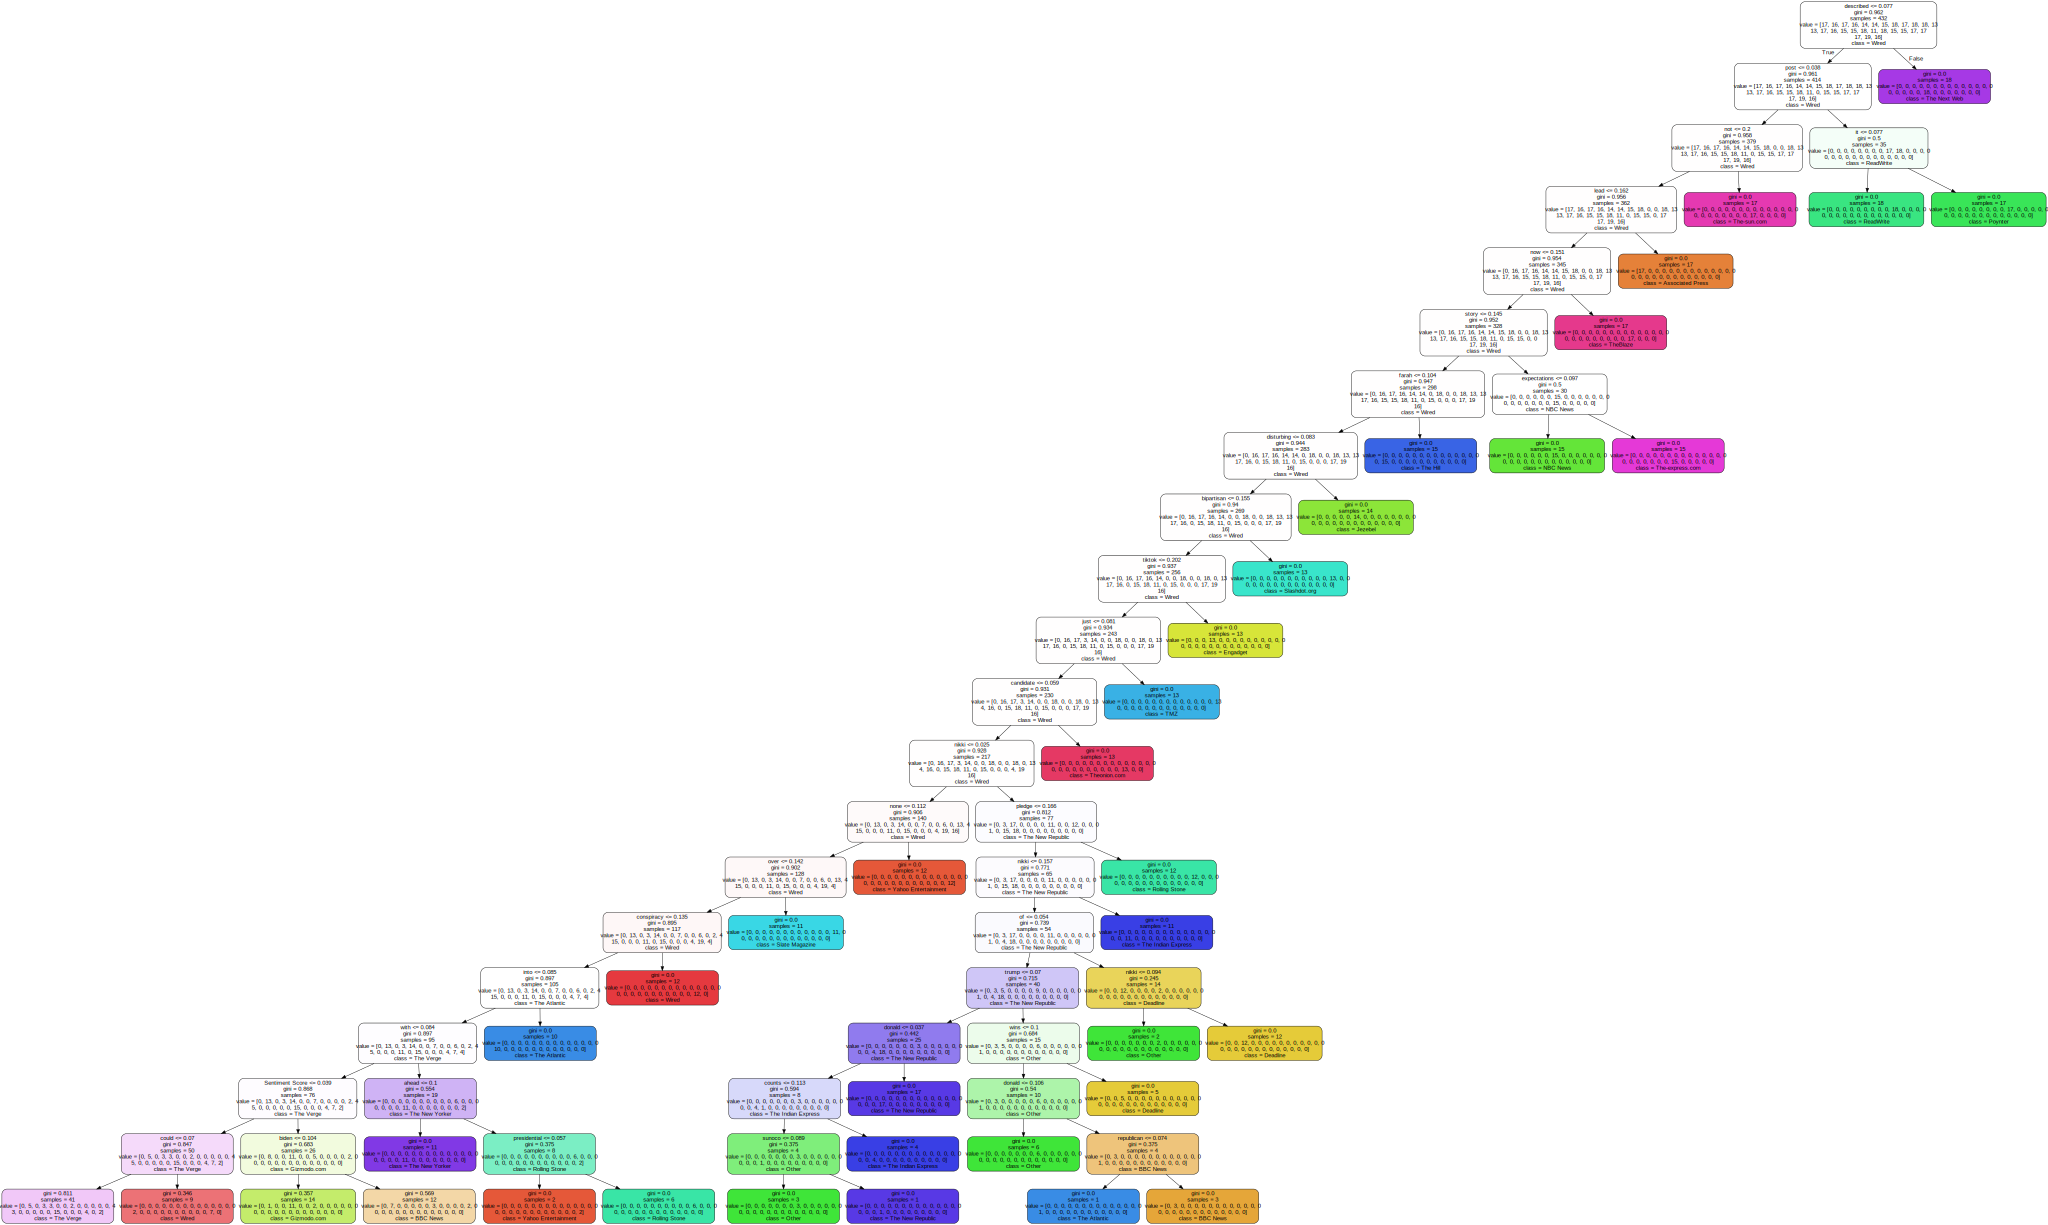

In [51]:
from sklearn.tree import export_graphviz
import graphviz

# Get the decision tree classifier from the condensed model
condensed_tree_classifier = dt_condensed_model.named_steps['classifier']

# Export as dot file
dot_data_condensed = export_graphviz(condensed_tree_classifier, out_file=None,
                           feature_names=preprocessor.transformers_[0][1].get_feature_names_out().tolist() +
                                         preprocessor.transformers_[1][1].get_feature_names_out().tolist() +
                                         ['Sentiment Score'],
                           class_names=dt_condensed_model.classes_,
                           rounded=True, filled=True)

# Use graphviz to create the tree diagram
graph_condensed = graphviz.Source(dot_data_condensed)

# Display the condensed decision tree
graph_condensed


# Old Models

## Clustering Approach

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


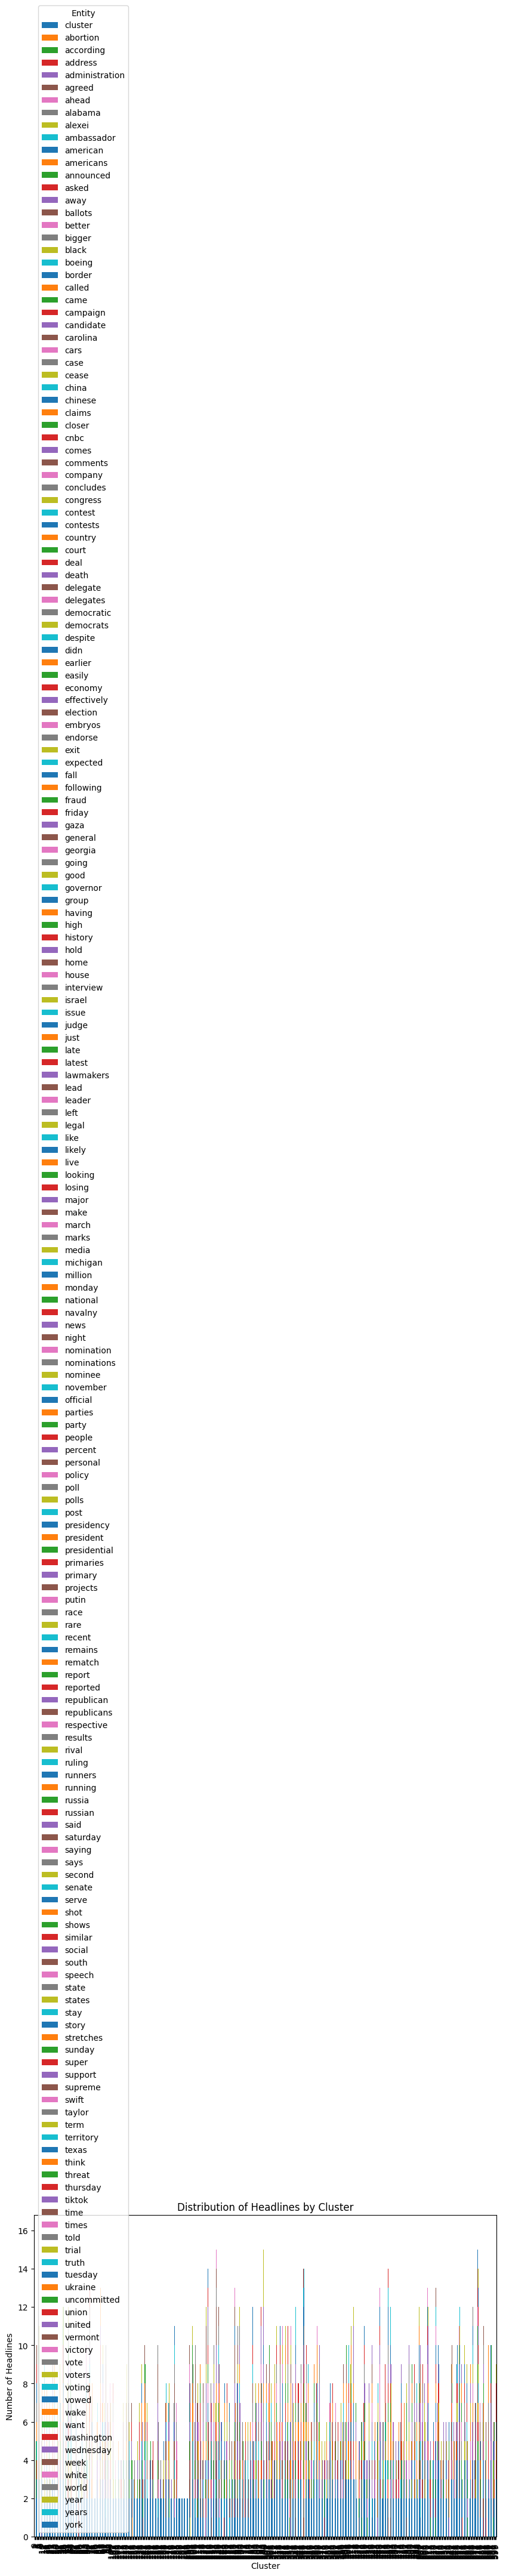

In [ ]:
# Clustering Model
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state = 42)
km.fit(MyDTM_DF)

MyDTM_DF['cluster'] = km.labels_

merged_df = pd.concat([MyDTM_DF['cluster'], Final_News_DF_Labeled], axis = 1)


merged_df.plot(kind='bar', stacked=True, figsize=(10, 7))


## Think that the above line should be this one instead?
# merged_df.plot(kind='bar', stacked=True, figsize=(10, 7))




for bar in plt.gca().patches:
    # Get the bar's position and dimensions
    x = bar.get_x()
    y = bar.get_y()
    height = bar.get_height()
    width = bar.get_width()

    # The label will be the height of the bar for this example
    label_text = f'{height:.0f}'  # Format the count as a string

    # Only add a label if the height is greater than zero
    if height > 5:
        plt.text(x + width/2, y + height/2, label_text, ha='center', va='center')

plt.xlabel("Cluster")
plt.ylabel('Number of Headlines')
plt.title('Distribution of Headlines by Cluster')
plt.legend(title="Entity")
plt.show()

In [ ]:
# Assuming 'Final_News_DF_Labeled' has a column named 'headline' that contains the text data
# Merging the cluster labels with the original headlines
merged_df_with_text = pd.concat([MyDTM_DF['cluster'], BBC_DF['Headline']], axis=1)

# Output sample headlines from each cluster
for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num} headlines:")
    sample_headlines = merged_df_with_text[merged_df_with_text['cluster'] == cluster_num]['Headline'].sample(5).values
    for headline in sample_headlines:
        print(headline)
    print("\n")


Cluster 0 headlines:
Americans Prosperity Action said will longer spend money behalf Nikki Haley presidential campaign
Nikki Haley announced Wednesday ending presidential campaign saying regrets
LaCivita responding DeSantis reported private comments about Trump vice presidential consideration
Trump aides already well securing Republican presidential nomination over Haley least March
conversation with reporters Friday Haley highlighted background accounting saying accountant stretches stretches stretches those dollars


Cluster 1 headlines:
Elmer Miller pulls Ford into Sunoco barren stretch Highway outside small town Barnwell South Carolina There Confederate flag front license plate frame Sons Confederate Veterans sticker window
Haley made commitment polls show Trump beating double digit margins South Carolina
analysts live blog updates results South Carolina primary Donald Trump enters contest with polling lead over former Nikki Haley
primary nation capital where former President Donal

## Multinomial Naive Bayes

In [ ]:
#

## Decision Tree Classifier

Accuracy: 0.35555555555555557
              precision    recall  f1-score   support

       biden       0.00      0.00      0.00        62
 nikki haley       0.65      0.27      0.39        62
       trump       0.31      0.84      0.46        56

    accuracy                           0.36       180
   macro avg       0.32      0.37      0.28       180
weighted avg       0.32      0.36      0.28       180



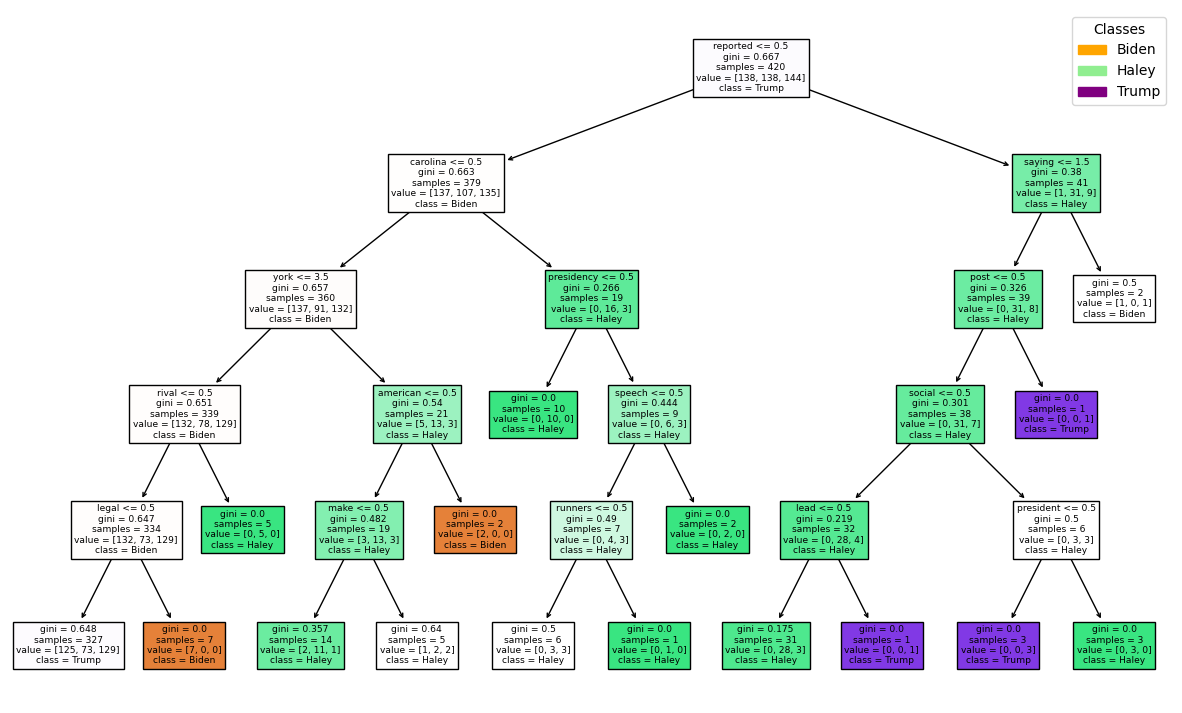

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

vectorizer = TfidfVectorizer()
vectorizer.fit(MyDTM_DF)

# Assuming 'MyDTM_DF' is your features matrix and 'Final_News_DF_Labeled' contains the target variable 'LABEL'
X = MyDTM_DF  # Your features matrix
y = Final_News_DF_Labeled['LABEL']  # Your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# If you want to visualize the tree
# Note: You might need to install additional packages like graphviz for this part
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

class_names = ['Biden', 'Haley', 'Trump']

plt.figure(figsize=(15,9))
plot_tree(dt_classifier, filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=class_names)
legend_colors = ['orange', 'lightgreen', 'purple']  # Example colors
class_legend = [mpatches.Patch(color=legend_colors[i], label=class_names[i]) for i in range(len(class_names))]
plt.legend(handles=class_legend, title="Classes")
plt.show()


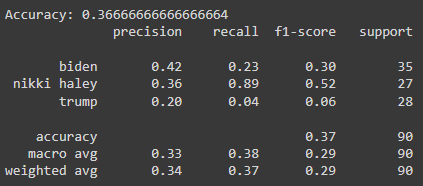

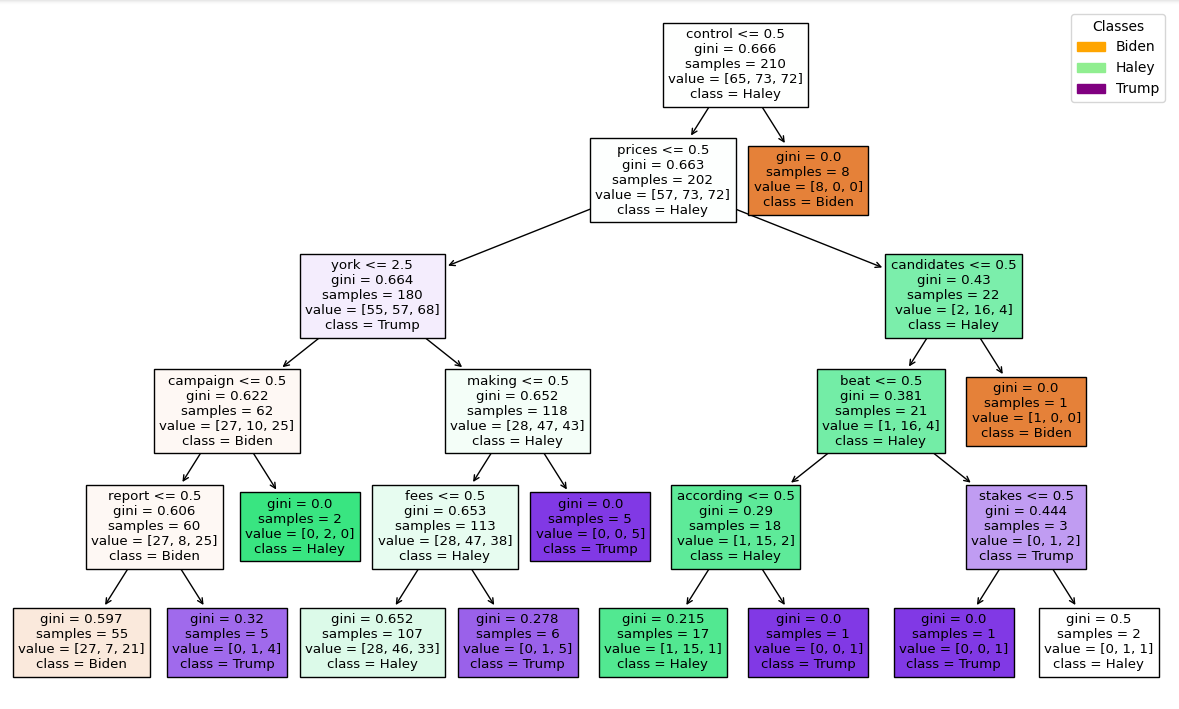